[View in Colaboratory](https://colab.research.google.com/github/hjjimmykim/RNN_Dynamics/blob/master/Dynamics_RNN.ipynb)

In [0]:
# Random Recurrent Neural Net (Sompolinsky 1988)
# Maximal Lyapunov constant calculation based on http://sprott.physics.wisc.edu/chaos/lyapexp.htm

import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters

In [0]:
# Network parameters
N = 2000                         # Number of neurons
g_list = np.linspace(0.5,1.5,11) # List of nonlinearity gains

output_length = len(g_list)

# Simulation parameters
N_burn = 500     # Number of burn-in steps
N_sample = 1000  # Number of sample collection steps
dt = 0.1         # Time step size (dt = 1 & Euler Forward => discrete)
d0 = 1e-8        # Separation between nearby trajectories (for maximal lambda calc)

N_total = N_burn + N_sample      # Total number of steps to simulate.

# Initial activity distribution parameters
mean = 0
sigma = 1

#Functions

In [0]:
# Sompolinsky (1988)
def RNN(x, W, g):
  return -x + np.dot(W,np.tanh(g*x))

# Euler-forward
def EF(x, W, g, dt, f):
  x_dot = f(x, W, g)
  return x + x_dot * dt

# RK4
def RK4(x, W, g, dt, f):
  k1 = dt * f(x, W, g)
  k2 = dt * f(x + 0.5*k1, W, g)
  k3 = dt * f(x + 0.5*k2, W, g)
  k4 = dt * f(x + k3, W, g)
  return x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)

# Simulation

In [4]:
lambda_list = np.zeros(output_length) # Maximal Lyapunov exponents list

t_start = time.time()
t1 = time.time()
# Loop over g's
for i in range(len(g_list)):
  g = g_list[i]
  
  # Generate random connectivity matrix
  W = np.random.normal(0,1/np.sqrt(N),[N,N])
  
  # Initial state
  h1 = np.random.normal(mean,sigma,[N,1])          # Reference trajectory
  rand_dir = np.random.randn(N).reshape(h1.shape)
  h2 = h1 + d0 * rand_dir/np.linalg.norm(rand_dir) # Nearby trajectory
  
  lambda_ = 0 # Maximal Lyapunov exponent
  
  # Simulate
  for j in range(N_total):
    
    # Update trajectories
    h1 = RK4(h1, W, g, dt, RNN)
    h2 = RK4(h2, W, g, dt, RNN)
    
    # Calculate distance
    d1 = np.linalg.norm(h1-h2)
    
    # Re-align nearby trajectory
    h2 = h1 + (d0/d1)*(h2-h1)
    
    if j > N_burn:
      lambda_ = lambda_ + np.log(d1/d0) # Update Lyapunov exponent
      
  lambda_list[i] = lambda_/(dt*N_sample)
  
  t2 = time.time()
  print('g = ' + str(g) + ' runtime: ' + str(t2-t1) + ' s')
  t1 = t2
print('Total runtime: ' + str(time.time()-t_start) + ' s')

g = 0.5 runtime: 39.86753535270691 s
g = 0.6 runtime: 40.600926876068115 s
g = 0.7 runtime: 39.99688458442688 s
g = 0.8 runtime: 40.32953071594238 s
g = 0.9 runtime: 41.27694916725159 s
g = 1.0 runtime: 39.353963136672974 s
g = 1.1 runtime: 39.71101093292236 s
g = 1.2000000000000002 runtime: 40.77321100234985 s
g = 1.3 runtime: 39.795249462127686 s
g = 1.4 runtime: 40.35733485221863 s
g = 1.5 runtime: 40.29680824279785 s
Total runtime: 442.36023569107056 s


#Plot

Note: Theory for g>1 assumes g->1+ so discrepancy would be expected.


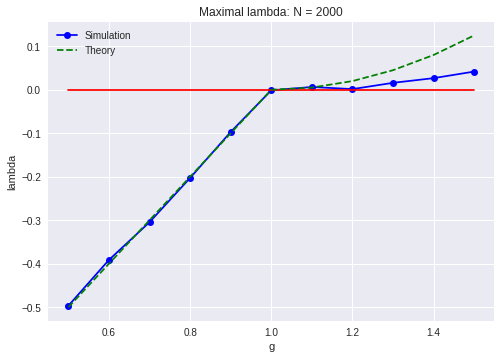

In [167]:
plt.figure()
p1 = plt.plot(g_list,lambda_list,'-ob',label='Simulation')
p2 = plt.plot(g_list,np.zeros(len(g_list)),'r') # 0
p3 = plt.plot(g_list, (g_list<1)*(-1+g_list) + (g_list>=1)*0.5*(g_list-1)**2,'--g',label='Theory')
plt.legend()
plt.xlabel('g');
plt.ylabel(r'lambda');
plt.title('Maximal lambda: N = ' + str(N));

print('Note: Theory for g>1 assumes g->1+ so discrepancy would be expected.')